In [1]:
# SH-I

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image as Image_

In [3]:
from fastai.vision import *

In [2]:
green_dict = {'background':0.0,
              'green_five':5.0,
              'green_four':4.0,
              'green_half':0.5,
              'green_half_half':1.0,
              'green_one':1.0,
              'green_one_half':1.5,
              'green_three':3.0,
              'green_three_half':3.5,
              'green_two':2.0,
              'green_two_half':2.5}

In [5]:
path = Path('./data/')
learn = load_learner(path, 'resnet18.pkl')

In [6]:
def count(img):
    pred_class,pred_idx,outputs = learn.predict(img)
    return green_dict[str(pred_class)]

In [7]:
def miscount(heat):
    n_len, m_len = heat.shape
    e_list = []

    for n in range(n_len):
        for m in range(m_len):
            try:
                if not 0.5 in (heat[n-1, m], heat[n, m+1], heat[n+1, m], heat[n, m-1]) and heat[n, m] == 0.5:
                    e_list.append(0.5)
            except:
                pass
    return e_list

In [8]:
image = path/'train'/'green_three'/'3_5_11.jpg'

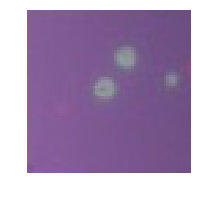

In [9]:
img = open_image(image)
img.show()

In [10]:
count(img)

2.0

In [11]:
def segment(arr, n, m, p=60):
    
    i_y = np.arange(arr.shape[0] // p) * p
    i_x = np.arange(arr.shape[1] // p) * p
    
    y = i_y[n]
    x = i_x[m]
    
    return arr[y:y+p, x:x+p, :]

def dim(arr, p=60):
    
    i_y = np.arange(arr.shape[0] // p) * p
    i_x = np.arange(arr.shape[1] // p) * p
    
    return len(i_y), len(i_x)

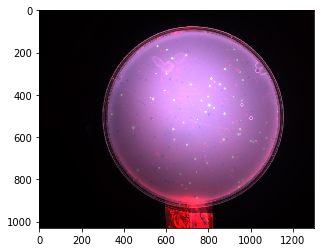

In [25]:
file = 'test.jpg'
img = Image_.open(path/file)
arr = np.array(img)
len_n, len_m = dim(arr)
plt.imshow(arr)
plt.show()

In [26]:
i_list = []

for n in range(len_n):
    
    for m in range(len_m):
        
        seg = segment(arr, n, m)
        img = Image(pil2tensor(seg,np.float32).div_(255))
        i = count(img)
        i_list.append(i)

In [27]:
int(np.array(i_list).sum())

60

In [28]:
int(np.array(i_list).sum() + sum(miscount(np.array(i_list).reshape(dim(arr))))) # adjusted

61

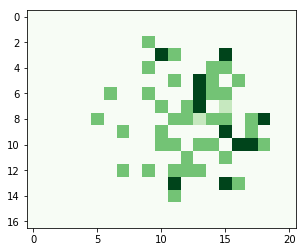

In [29]:
heat = np.array(i_list).reshape(dim(arr))
plt.imshow(heat, cmap='Greens')
plt.show()